In [1]:
import netCDF4 as nc

#PATH_HYCOM = '../data/HYCOM/GLBa0_expt_91.nc4'
PATH_HYCOM = '../data/NOAA/gdp_v2.00.nc'

ds = nc.Dataset(PATH_HYCOM)

In [3]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Global Drifter Program hourly drifting buoy collection
    history: Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions: CF-1.6
    date_created: 2022-01-14T11:16:01.998226
    publisher_name: GDP Drifter DAC
    publisher_email: aoml.dftr@noaa.gov
    publisher_url: https://www.aoml.noaa.gov/phod/gdp
    licence: MIT License
    processing_level: Level 2 QC by GDP drifter DAC
    metadata_link: https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name: NOAA Global Drifter Program
    contributor_role: Data Acquisition Center
    institution: NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement: Elipot et al. (2022) to be submitted. Elipot et al. (2016). Global Drifter Program quality-controlled hourly interpolated data from ocean surface drifting buoys, version 2.00. NOAA National Centers for Environmental Information. https://agupubs.o

In [4]:
ds.variables

{'rowsize': <class 'netCDF4._netCDF4.Variable'>
 int64 rowsize(traj)
     long_name: Number of observations per trajectory
     units: -
     coordinates: ID
 unlimited dimensions: 
 current shape = (17324,)
 filling on, default _FillValue of -9223372036854775806 used,
 'location_type': <class 'netCDF4._netCDF4.Variable'>
 int8 location_type(traj)
     long_name: Satellite-based location system
     units: -
     comments: 0 (Argos), 1 (GPS)
     coordinates: ID
     dtype: bool
 unlimited dimensions: 
 current shape = (17324,)
 filling on, default _FillValue of -127 ignored,
 'WMO': <class 'netCDF4._netCDF4.Variable'>
 int32 WMO(traj)
     long_name: World Meteorological Organization buoy identification number
     units: -
     coordinates: ID
 unlimited dimensions: 
 current shape = (17324,)
 filling on, default _FillValue of -2147483647 used,
 'expno': <class 'netCDF4._netCDF4.Variable'>
 int32 expno(traj)
     long_name: Experiment number
     units: -
     coordinates: ID
 unlimi

In [2]:
lats = ds.variables['latitude']
lats = lats[:].data
lons = ds.variables['longitude']
lons = lons[:].data
time = ds.variables['time']
time = time[:].data

In [3]:
ids = ds.variables['ids'] #indices de la trajectoire à laquelle appartient chaque pt
ids = ids[:].data

In [10]:
ids

array([ 101143,  101143,  101143, ..., 9929870, 9929870, 9929870],
      dtype=int64)

In [12]:
import numpy as np
len(np.unique(ids))

17324

In [13]:
len(ids)

165754333

In [4]:
import pandas as pd

df = pd.DataFrame(data={'latitude':lats, 'longitude':lons, 'time':time,'ids':ids})
df.head()

,latitude,longitude,time,ids
0,14.74677,-17.74345,1331848800,101143
1,14.75717,-17.74526,1331852400,101143
2,14.76780,-17.74375,1331856000,101143
3,14.77795,-17.74173,1331859600,101143
4,14.78923,-17.73838,1331863200,101143


In [18]:
ds.variables['time'].units
# on doit convertir en h depuis 1/1/2000

'seconds since 1970-01-01'

In [5]:
from datetime import datetime, timedelta

def convert_seconds_into_hours_since_2000(seconds):
    ref1970 = datetime(1970,1,1,0,0,0)
    ref2000 = datetime(2000,1,1,0,0,0)
    century_diff = ref2000-ref1970
    sec2000 = seconds - century_diff.total_seconds()
    return sec2000/3600 # convert in h

In [6]:
def convert_date(nseconds):
    # returns day but not hour
    reference = datetime(1970,1,1,0,0,0)
    time_delta = timedelta(seconds=nseconds)
    date = reference + time_delta
    return date

In [7]:
#df['time'] = df['time'].apply(lambda x: convert_seconds_into_hours_since_2000(x))
df['date'] = df['time'].apply(lambda x: convert_date(x))

In [8]:
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)

In [21]:
df.head()

,latitude,longitude,time,ids
0,14.74677,-17.74345,106990.0,101143
1,14.75717,-17.74526,106991.0,101143
2,14.76780,-17.74375,106992.0,101143
3,14.77795,-17.74173,106993.0,101143
4,14.78923,-17.73838,106994.0,101143


In [9]:
df.describe()

,latitude,longitude,time,ids,date,month,year
count,1.657543e+08,1.657543e+08,1.657543e+08,1.657543e+08,165754333,1.657543e+08,1.657543e+08
mean,-2.768859e+00,-1.837225e+01,1.324605e+09,7.143074e+13,2011-12-23 01:45:56.999517440,6.527582e+00,2.011474e+03
min,-7.830718e+01,-1.800000e+02,5.601780e+08,2.578000e+03,1987-10-02 13:00:00,1.000000e+00,1.987000e+03
25%,-3.345961e+01,-1.098465e+02,1.192550e+09,5.989700e+04,2007-10-16 16:00:00,3.000000e+00,2.007000e+03
50%,-7.841480e+00,-3.130491e+01,1.323403e+09,9.889500e+04,2011-12-09 04:00:00,7.000000e+00,2.011000e+03
75%,2.874993e+01,6.696621e+01,1.471093e+09,9.619411e+06,2016-08-13 13:00:00,1.000000e+01,2.016000e+03
max,8.989858e+01,1.800000e+02,1.593558e+09,3.005341e+14,2020-06-30 23:00:00,1.200000e+01,2.020000e+03
std,2.406898e+01,7.375245e+01,1.667639e+08,1.278421e+14,NaN,3.474242e+00,5.292355e+00


In [14]:
df.to_csv('NOAA_points_with_date.csv')

<Axes: xlabel='month', ylabel='Count'>

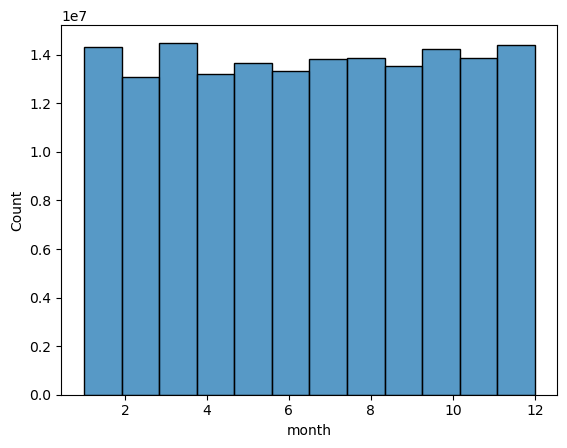

In [11]:
import seaborn as sns

sns.histplot(data=df, x="month", bins=12)

MemoryError: Unable to allocate 1.23 GiB for an array with shape (165754333,) and data type int64

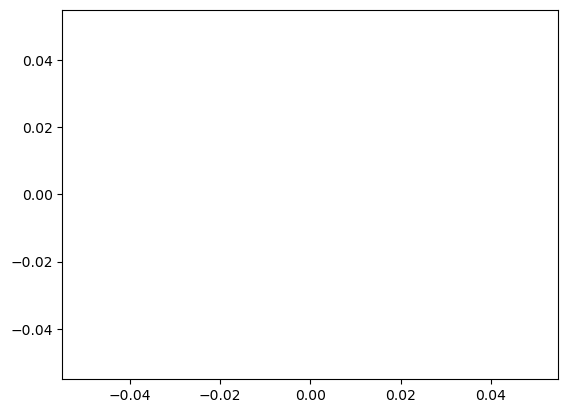

In [13]:
sns.histplot(data=df, x='year', bins=34)

KeyboardInterrupt: 

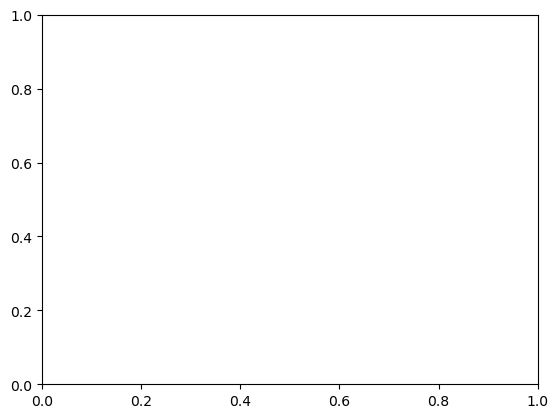

In [12]:
sns.countplot(x='month', data=df)

In [24]:
import os

grouped = df.groupby('ids')
print('Grouped!')
for name, group in grouped:
    filename = '../data/NOAA/trajectories/traj_' + str(name) + '.csv'
    group.to_csv(filename)

Grouped!
